## Data Analysis Platform Generated Code


In [2]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 数据已经过`目标选择`步骤处理，第一列是预测目标，其余列为feature
data_path = '/home/zhuyh/projects/wudao-backend/static/data/a/data_target_confirmed.csv'

# 读CSV数据文件
df = pd.read_csv(data_path)

# 大致观察一下数据情况
print(df)
print(df.describe())

        crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
0    0.26169   0.0   9.90     0  0.5440  6.023  90.4  2.8340    4  304   
1    5.70818   0.0  18.10     0  0.5320  6.750  74.9  3.3317   24  666   
2    0.02899  40.0   1.25     0  0.4290  6.939  34.5  8.7921    1  335   
3    0.49298   0.0   9.90     0  0.5440  6.635  82.5  3.3175    4  304   
4    0.54452   0.0  21.89     0  0.6240  6.151  97.9  1.6687    4  437   
..       ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
261  0.06129  20.0   3.33     1  0.4429  7.645  49.7  5.2119    5  216   
262  0.05425   0.0   4.05     0  0.5100  6.315  73.4  3.3175    5  296   
263  2.92400   0.0  19.58     0  0.6050  6.101  93.0  2.2834    5  403   
264  0.21977   0.0   6.91     0  0.4480  5.602  62.0  6.0877    3  233   
265  2.73397   0.0  19.58     0  0.8710  5.597  94.9  1.5257    5  403   

     ptratio  lstat  medv  
0       18.4  11.72  19.4  
1       20.2   7.74  23.7  
2       19.7   5.89  26.6  

In [4]:
# Z-Score数据标准化
def zscore_data(df):
    # 由于第一列为预测目标，无需作标准化
    df_features = df.iloc[:, 1:]
    df_features = df_features.apply(lambda x: (x - x.mean()) / (x.std()+1e-12))
    df = pd.concat([df.iloc[:,0], df_features], axis=1)
    return df

In [5]:
# 缺失填充
def fill_data(df, fill_type):
    if fill_type == '均值填充':
        # 因为已经zscore好了，所以只需补0即可，0即为均值
        df.fillna(value=0, inplace=True)
    elif fill_type == '中位数填充':
        # 先计算出原始feature的中位数
        info = []
        for _, e in enumerate(df.columns):
            h = {}
            h['name'] = e
            h['median'] = float(df[e].median())
            info.append(h)
        for idx, e in enumerate(df.columns):
            df[e].fillna(value=info[idx]['median'], inplace=True)
    return df

In [6]:
# 离群值筛选
def filter_data(df, bar):
    # 除第一列外，如果该行存在大于bar的值，则删除该行
    for f in df.iloc[:,1:].columns:
        df = df[abs(df[f]) < bar]
    return df

In [7]:
# Call functions above
df = zscore_data(df)
df = fill_data(df, fill_type='均值填充')
df = filter_data(df, bar=3)
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,232.000000,232.000000,232.000000,2.320000e+02,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,3.637477,-0.149286,0.021129,-2.607996e-01,0.012748,-0.010107,0.023274,-0.046525,0.009322,0.010142,0.061560,0.022091,-0.087980
std,7.807497,0.691334,0.985063,1.668935e-15,0.955361,0.872750,0.986702,0.923630,0.998961,1.001941,0.978163,0.934469,0.926184
min,0.010960,-0.467199,-1.460743,-2.607996e-01,-1.461425,-2.654609,-2.216203,-1.261404,-1.005071,-1.291305,-2.532483,-1.541604,-1.892421
25%,0.088620,-0.467199,-0.841604,-2.607996e-01,-0.816920,-0.534364,-0.724073,-0.786425,-0.666940,-0.776540,-0.469696,-0.684311,-0.663230
50%,0.260420,-0.467199,-0.218156,-2.607996e-01,-0.181008,-0.118670,0.297231,-0.380243,-0.554230,-0.469995,0.327289,-0.166498,-0.249990
75%,4.094135,-0.467199,0.959788,-2.607996e-01,0.618179,0.353772,0.901694,0.484744,1.587267,1.473389,0.842986,0.667518,0.171146
max,73.534100,2.923349,2.344590,-2.607996e-01,2.680598,2.957601,1.111442,2.835288,1.587267,1.733663,1.311801,2.598039,2.845360


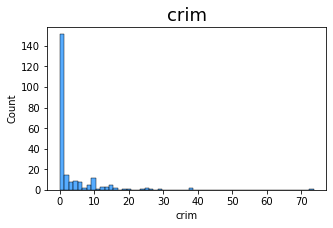

<Figure size 432x288 with 0 Axes>

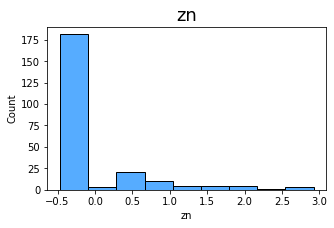

<Figure size 432x288 with 0 Axes>

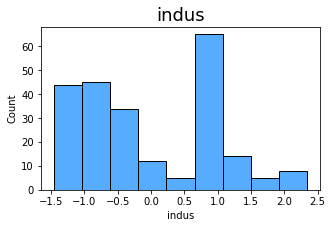

<Figure size 432x288 with 0 Axes>

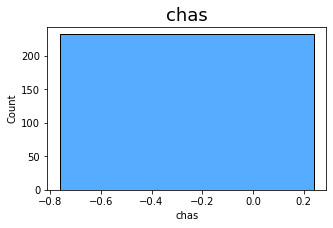

<Figure size 432x288 with 0 Axes>

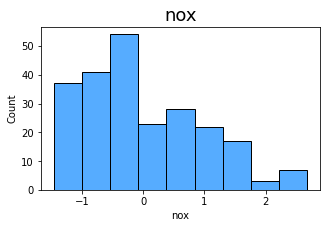

<Figure size 432x288 with 0 Axes>

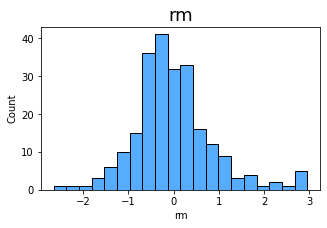

<Figure size 432x288 with 0 Axes>

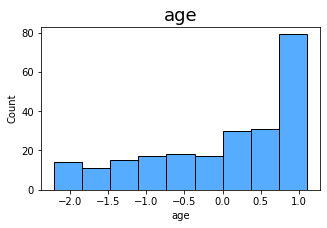

<Figure size 432x288 with 0 Axes>

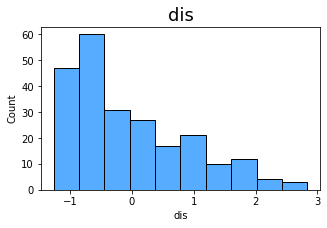

<Figure size 432x288 with 0 Axes>

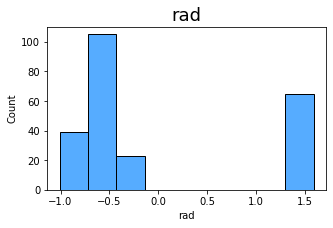

<Figure size 432x288 with 0 Axes>

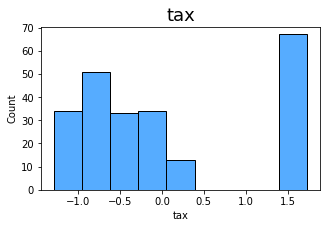

<Figure size 432x288 with 0 Axes>

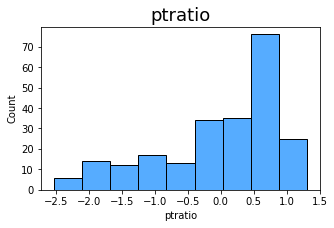

<Figure size 432x288 with 0 Axes>

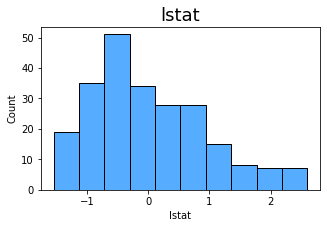

<Figure size 432x288 with 0 Axes>

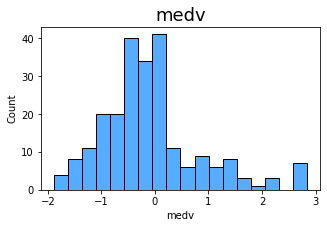

<Figure size 432x288 with 0 Axes>

In [8]:
# 绘制各特征的频率分布直方图
def plot_hist(df):
    for _, f in enumerate(df.columns):
        plt.figure(figsize=(5,3))
        plt.title(f,fontsize=18)
        sns.histplot(data=df[f], color="dodgerblue")
        plt.show()
        plt.clf()
plot_hist(df)

/home/zhuyh/miniconda3/envs/web/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


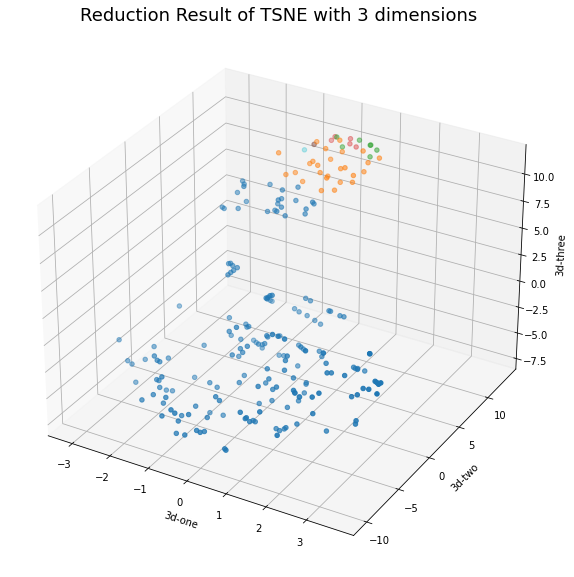

In [9]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
def data_dimension_reduction(df, method, dimension, target):
    if method=='PCA': # 判断降维类别
        reduction_model = PCA().fit_transform(df)
    elif method=='TSNE':
        reduction_model = TSNE(n_components=dimension, learning_rate='auto').fit_transform(df)
    df_target=df[target]
    if dimension ==2: # 判断降维维度
        df_subset = pd.DataFrame({'2d-one': reduction_model[:,0], '2d-two': reduction_model[:,1], 'target': df_target})
        plt.figure(figsize=(10,10))
        sns.scatterplot(
            x="2d-one", y="2d-two",
            hue="target",
            palette=sns.color_palette("hls", df_target.shape[0]),
            data=df_subset,
            legend=False,
            alpha=0.3,
        )
    elif dimension==3:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        df_subset = pd.DataFrame({'3d-one': reduction_model[:,0], '3d-two': reduction_model[:,1], '3d-three': reduction_model[:,2], 'target': df_target})
        ax.scatter(
            xs=df_subset["3d-one"], 
            ys=df_subset["3d-two"], 
            zs=df_subset["3d-three"], 
            c=df_subset["target"], 
            cmap='tab10'
        )
        ax.set_xlabel('3d-one')
        ax.set_ylabel('3d-two')
        ax.set_zlabel('3d-three')
    plt.title(f'Reduction Result of {method} with {dimension} dimensions', fontsize=18)
    plt.show()
    return df
df = data_dimension_reduction(df, 'TSNE', 3, 'crim')

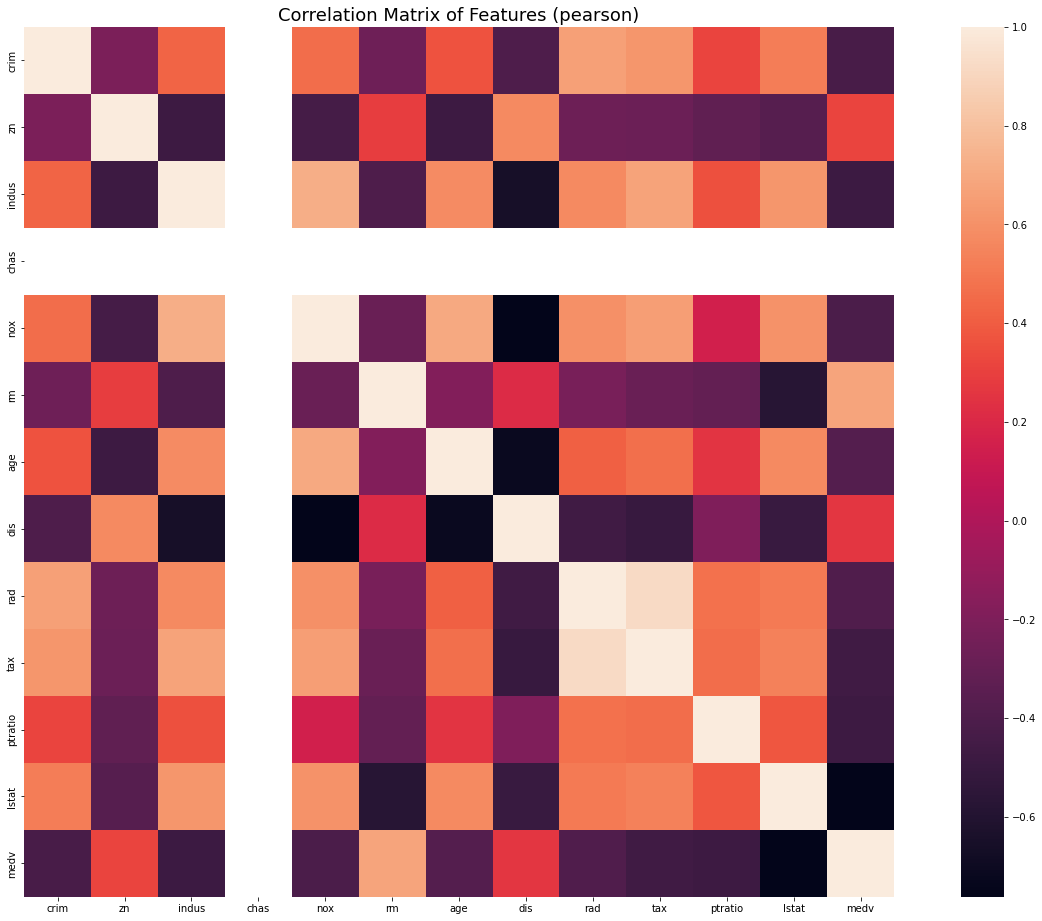

In [10]:
# 特征的相关矩阵
def feature_correlation(df, method):
    # method = 'pearson' | 'kendall' | 'spearman'
    corr_mat = df.corr(method = method)
    plt.subplots(figsize=(24, 16))
    sns.heatmap(corr_mat, square=True)
    plt.title(f'Correlation Matrix of Features ({method})', fontsize=18)
    return df
df = feature_correlation(df, 'pearson')

               zn      crim     indus  chas       nox        rm       age  \
zn       1.000000 -0.533275 -0.616416   NaN -0.616432  0.368874 -0.516823   
crim    -0.533275  1.000000  0.714649   NaN  0.797175 -0.300744  0.657550   
indus   -0.616416  0.714649  1.000000   NaN  0.764573 -0.431482  0.647283   
chas          NaN       NaN       NaN   NaN       NaN       NaN       NaN   
nox     -0.616432  0.797175  0.764573   NaN  1.000000 -0.324985  0.797551   
rm       0.368874 -0.300744 -0.431482   NaN -0.324985  1.000000 -0.239254   
age     -0.516823  0.657550  0.647283   NaN  0.797551 -0.239254  1.000000   
dis      0.603877 -0.688956 -0.727038   NaN -0.883477  0.267404 -0.801450   
rad     -0.191360  0.721037  0.406841   NaN  0.533672 -0.068810  0.360860   
tax     -0.319277  0.709726  0.615709   NaN  0.618028 -0.215240  0.489665   
ptratio -0.431624  0.437700  0.430595   NaN  0.381106 -0.285061  0.371329   
lstat   -0.448014  0.608453  0.633131   NaN  0.638377 -0.610866  0.631945   

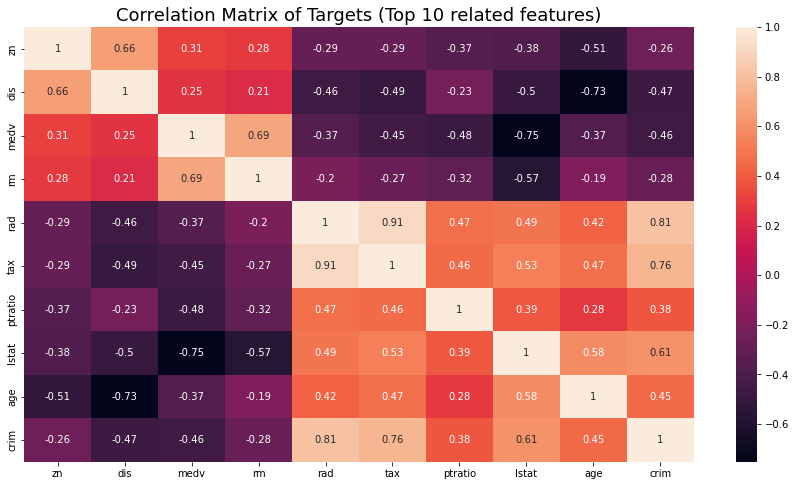

In [10]:
# 目标的相关矩阵：找到与目标值相关性最大的几个特征，而这几个特征之间的相关性要低
def target_correlation(df, k_number, target):
    # 默认使用spearman相关性
    corr_mat = df.corr(method = 'spearman')
    # nlargest可以用于找到列表中最大的前k_number个元素
    cols = corr_mat.nlargest(k_number, target)[target].index
    cm = np.corrcoef(df[cols].values.T)
    plt.subplots(figsize=(24, 16))
    sns.heatmap(cm, annot=True, square=False, yticklabels=cols.values, xticklabels=cols.values)
    plt.title(f'Correlation Matrix of Targets (Top {k_number} related features)', fontsize=18)
    plt.show()
    return df
# print(df.describe())
df = target_correlation(df, 10, 'zn')




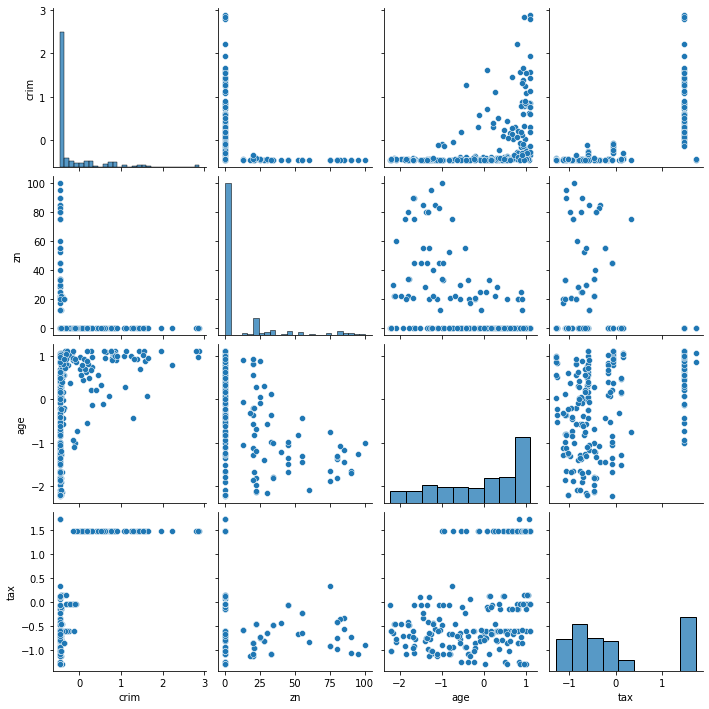

In [12]:
# pairwise feature correlation
def pairwise_feature_correlation(df: pd.DataFrame, features: list[str]) -> pd.DataFrame:
    sns.pairplot(df[features], height = 2.5)
    plt.show()
    return df
df = pairwise_feature_correlation(df, ['crim', 'zn', 'age', 'tax'])